In [19]:
from sklearn import tree
from sklearn import inspection
import matplotlib
from matplotlib import pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split

import math

# cokie laptop
dataPath = "C:\\Users\\cokie\\Workspace\\GithubProjects\\MLPlay\\data\\"

In [20]:
x_data = np.load(dataPath+"2D_GroupsData_X.npy")
y_data = np.load(dataPath+"2D_GroupsData_Y.npy")

# Todo: should probably read these in somehow
colorL = ['red', 'blue', 'green']

In [21]:
def UnZip(list_):
	nElem = len(list_)
	nDim = len(list_[0])
	
	result = [[] for _ in range(nDim)]
	for i in range(nElem):
		for j in range(nDim):
			result[j].append(list_[i][j])
		
	return result

def Group(list_):
	copy = sorted(list_, key=lambda p: p[0])
	
	result = []
	
	i = 0
	prev = copy[0][0]
	out = [copy[0][1]]

	for i in range(1, len(list_)):
		curr = copy[i][0]

		if curr == prev:
			out.append(copy[i][1])
		else:
			result.append((prev,out))
			out = [copy[i][1]]
			prev = curr
		
	result.append((prev, out))
	
	return result  	

In [22]:
byType = Group(list(zip(x_data, y_data)))

fig,ax = plot.subplots(figsize=(6.5,6.5))
ax.set_aspect('equal')

for t, pointL in byType:
	x,y = UnZip(pointL)
	plot.plot(x,y, 'o', markersize=4, color=colorL[t])
	
plot.savefig(dataPath + 'GenData.png')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [9]:
x_train, x_test , y_train , y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

trainSize = len(x_train)
testSize = len(x_test)

NameError: name 'x_data' is not defined

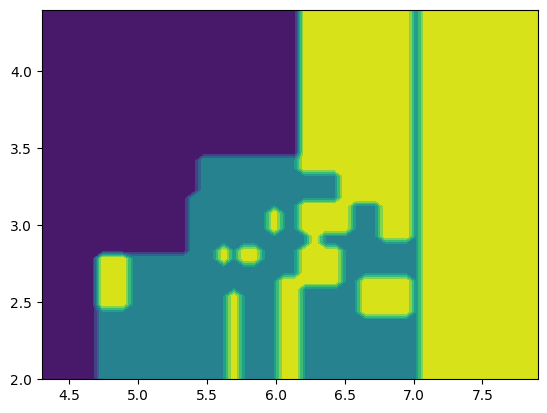

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
feature_1, feature_2 = np.meshgrid(
    ## default samples generated by linspace is 50
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

clf = tree.DecisionTreeClassifier().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(clf.predict(grid), feature_1.shape)

display=inspection.DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)

display.plot()